In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [28]:
!ls ../../data/kdd/

kddcup99.html  kddcup.data  kddcup.names


In [29]:
columns = '''duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.'''

columns = columns.replace(": continuous.", ",").replace(": symbolic.", ",").replace("\n", "")[:-1].split(",")
columns.append("target")

In [30]:
data = pd.read_csv("../../data/kdd/kddcup.data", names=columns)
print(data.shape)

(4898431, 42)


In [31]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


\newpage

# http (KDDCUP99) dataset

In [32]:
data_http = data[["service", "duration", "src_bytes", "dst_bytes", "logged_in", "target"]]
data_http = data_http[(data_http["service"] == "http") & (data_http["logged_in"] == 1)]
data_http.loc[data_http["target"] != "normal.", "target"] = 1
data_http.loc[data_http["target"] == "normal.", "target"] = 0

print(data_http.shape)

(567498, 6)


In [33]:
data_http.head()

,service,duration,src_bytes,dst_bytes,logged_in,target
0,http,0,215,45076,1,0
1,http,0,162,4528,1,0
2,http,0,236,1228,1,0
3,http,0,233,2032,1,0
4,http,0,239,486,1,0


In [34]:
m = data_http.shape[0]
n_outliers = (data_http["target"] == 1).sum()

print(f"m: {m}")
print(f"#outliers: {n_outliers} ({n_outliers / m * 100:.3f}%)")

m: 567498
#outliers: 2211 (0.390%)


\newpage

## dst_bytes vs src_bytes

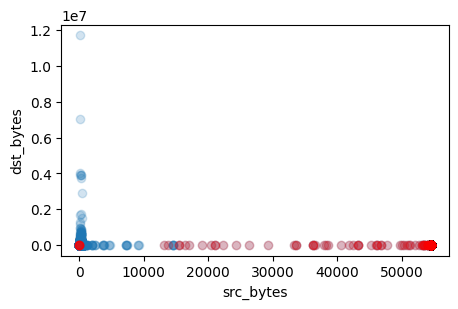

In [35]:
plt.figure(figsize=(5, 3))

plt.scatter(data_http["src_bytes"], data_http["dst_bytes"], alpha=0.2)
plt.scatter(data_http.loc[data_http["target"] == 1, "src_bytes"], data_http.loc[data_http["target"] == 1, "dst_bytes"], c="red", alpha=0.2)

plt.xlabel("src_bytes")
plt.ylabel("dst_bytes")
plt.show()

zlogarytmowane wartości obu zmiennych

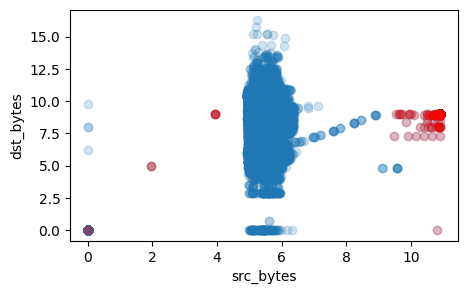

In [36]:
plt.figure(figsize=(5, 3))

plt.scatter(np.log(data_http["src_bytes"] + 1), np.log(data_http["dst_bytes"] + 1), alpha=0.2)
plt.scatter(np.log(data_http.loc[data_http["target"] == 1, "src_bytes"] + 1), np.log(data_http.loc[data_http["target"] == 1, "dst_bytes"] + 1), c="red", alpha=0.2)

plt.xlabel("src_bytes")
plt.ylabel("dst_bytes")
plt.show()

\newpage

## src_bytes vs duration

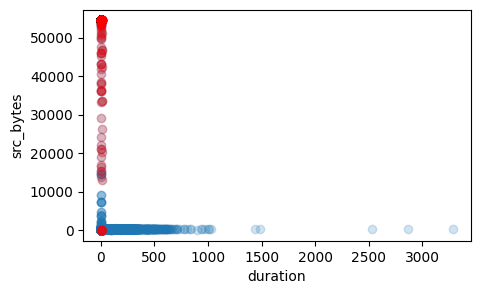

In [37]:
plt.figure(figsize=(5, 3))

plt.scatter(data_http["duration"], data_http["src_bytes"], alpha=0.2)
plt.scatter(data_http.loc[data_http["target"] == 1, "duration"], data_http.loc[data_http["target"] == 1, "src_bytes"], c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("src_bytes")
plt.show()

zlogarytmowane wartości obu zmiennych

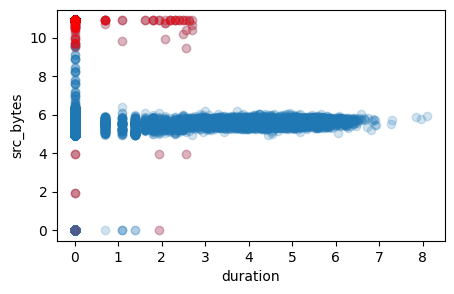

In [38]:
plt.figure(figsize=(5, 3))

plt.scatter(np.log(data_http["duration"] + 1), np.log(data_http["src_bytes"] + 1), alpha=0.2)
plt.scatter(np.log(data_http.loc[data_http["target"] == 1, "duration"] + 1), np.log(data_http.loc[data_http["target"] == 1, "src_bytes"] + 1), c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("src_bytes")
plt.show()

\newpage

## dst_bytes vs duration

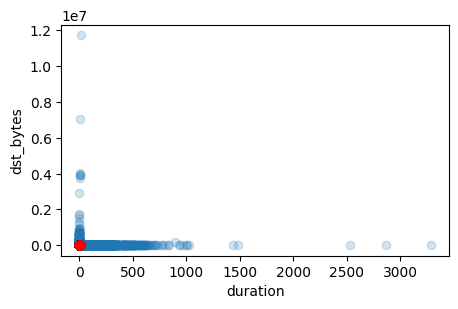

In [39]:
plt.figure(figsize=(5, 3))

plt.scatter(data_http["duration"], data_http["dst_bytes"], alpha=0.2)
plt.scatter(data_http.loc[data_http["target"] == 1, "duration"], data_http.loc[data_http["target"] == 1, "dst_bytes"], c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("dst_bytes")
plt.show()

zlogarytmowane wartości obu zmiennych

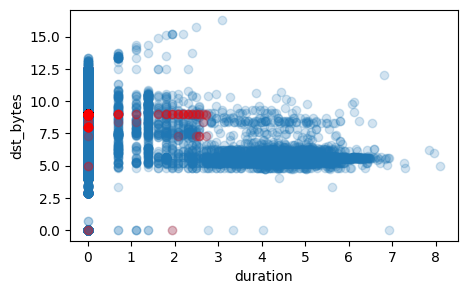

In [40]:
plt.figure(figsize=(5, 3))

plt.scatter(np.log(data_http["duration"] + 1), np.log(data_http["dst_bytes"] + 1), alpha=0.2)
plt.scatter(np.log(data_http.loc[data_http["target"] == 1, "duration"] + 1), np.log(data_http.loc[data_http["target"] == 1, "dst_bytes"] + 1), c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("dst_bytes")
plt.show()

\newpage

## 3d src_bytes vs dst_bytes vs duration

zlogarytmowane wartości

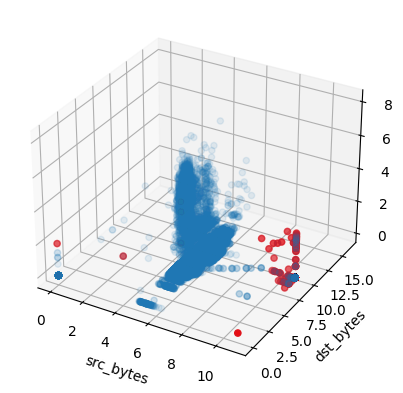

In [43]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(np.log(data_http["src_bytes"] + 1), np.log(data_http["dst_bytes"] + 1), np.log(data_http["duration"] + 1), alpha=0.1)
ax.scatter(np.log(data_http.loc[data_http["target"] == 1, "src_bytes"] + 1),
           np.log(data_http.loc[data_http["target"] == 1, "dst_bytes"] + 1),
           np.log(data_http.loc[data_http["target"] == 1, "duration"] + 1), c="red")

ax.set_xlabel("src_bytes")
ax.set_ylabel("dst_bytes")
ax.set_zlabel("duration")
plt.show()

\newpage

# smtp (KDDCUP99) dataset

In [44]:
data_smtp = data[["service", "duration", "src_bytes", "dst_bytes", "logged_in", "target"]]
data_smtp = data_smtp[(data_smtp["service"] == "smtp") & (data_smtp["logged_in"] == 1)]
data_smtp.loc[data_smtp["target"] != "normal.", "target"] = 1
data_smtp.loc[data_smtp["target"] == "normal.", "target"] = 0

print(data_smtp.shape)

(95156, 6)


In [45]:
data_smtp.head()

,service,duration,src_bytes,dst_bytes,logged_in,target
2062,smtp,1,1207,329,1,0
2063,smtp,1,1679,333,1,0
2064,smtp,0,979,330,1,0
2065,smtp,1,1535,325,1,0
2066,smtp,1,1706,326,1,0


In [46]:
m = data_smtp.shape[0]
n_outliers = (data_smtp["target"] == 1).sum()

print(f"m: {m}")
print(f"#outliers: {n_outliers} ({n_outliers / m * 100:.3f}%)")

m: 95156
#outliers: 30 (0.032%)


\newpage

## dst_bytes vs src_bytes

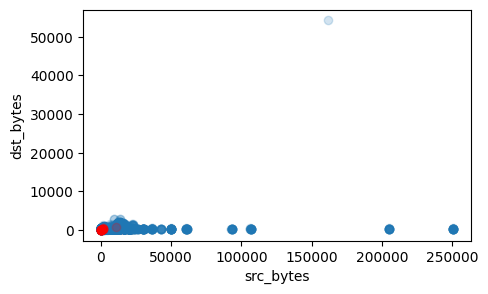

In [47]:
plt.figure(figsize=(5, 3))

plt.scatter(data_smtp["src_bytes"], data_smtp["dst_bytes"], alpha=0.2)
plt.scatter(data_smtp.loc[data_smtp["target"] == 1, "src_bytes"], data_smtp.loc[data_smtp["target"] == 1, "dst_bytes"], c="red", alpha=0.2)

plt.xlabel("src_bytes")
plt.ylabel("dst_bytes")
plt.show()

zlogarytmowane wartości obu zmiennych

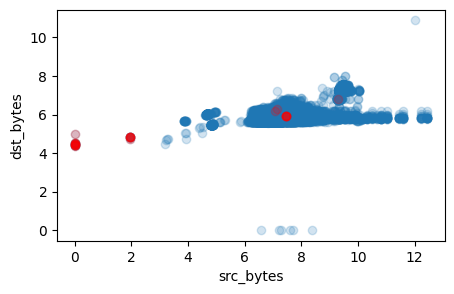

In [48]:
plt.figure(figsize=(5, 3))

plt.scatter(np.log(data_smtp["src_bytes"] + 1), np.log(data_smtp["dst_bytes"] + 1), alpha=0.2)
plt.scatter(np.log(data_smtp.loc[data_smtp["target"] == 1, "src_bytes"] + 1), np.log(data_smtp.loc[data_smtp["target"] == 1, "dst_bytes"] + 1), c="red", alpha=0.2)

plt.xlabel("src_bytes")
plt.ylabel("dst_bytes")
plt.show()

\newpage

## src_bytes vs duration

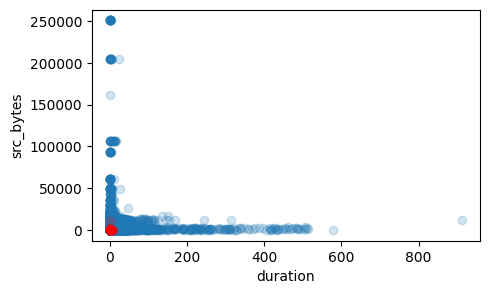

In [49]:
plt.figure(figsize=(5, 3))

plt.scatter(data_smtp["duration"], data_smtp["src_bytes"], alpha=0.2)
plt.scatter(data_smtp.loc[data_smtp["target"] == 1, "duration"], data_smtp.loc[data_smtp["target"] == 1, "src_bytes"], c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("src_bytes")
plt.show()

zlogarytmowane wartości obu zmiennych

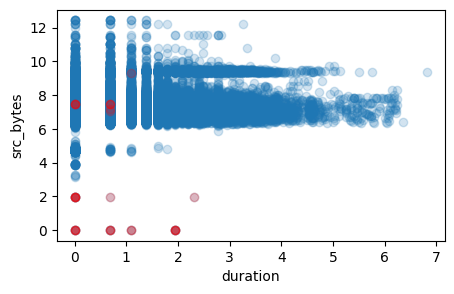

In [50]:
plt.figure(figsize=(5, 3))

plt.scatter(np.log(data_smtp["duration"] + 1), np.log(data_smtp["src_bytes"] + 1), alpha=0.2)
plt.scatter(np.log(data_smtp.loc[data_smtp["target"] == 1, "duration"] + 1), np.log(data_smtp.loc[data_smtp["target"] == 1, "src_bytes"] + 1), c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("src_bytes")
plt.show()

\newpage

## dst_bytes vs duration

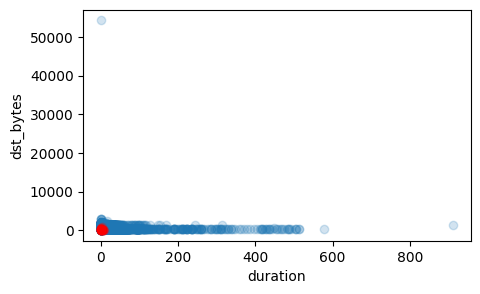

In [51]:
plt.figure(figsize=(5, 3))

plt.scatter(data_smtp["duration"], data_smtp["dst_bytes"], alpha=0.2)
plt.scatter(data_smtp.loc[data_smtp["target"] == 1, "duration"], data_smtp.loc[data_smtp["target"] == 1, "dst_bytes"], c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("dst_bytes")
plt.show()

zlogarytmowane wartości obu zmiennych

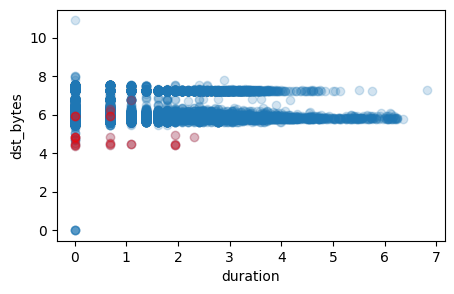

In [52]:
plt.figure(figsize=(5, 3))

plt.scatter(np.log(data_smtp["duration"] + 1), np.log(data_smtp["dst_bytes"] + 1), alpha=0.2)
plt.scatter(np.log(data_smtp.loc[data_smtp["target"] == 1, "duration"] + 1), np.log(data_smtp.loc[data_smtp["target"] == 1, "dst_bytes"] + 1), c="red", alpha=0.2)

plt.xlabel("duration")
plt.ylabel("dst_bytes")
plt.show()

\newpage

## 3d src_bytes vs dst_bytes vs duration

zlogarytmowane wartości

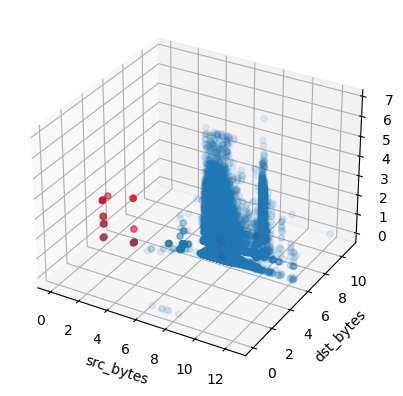

In [53]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(np.log(data_smtp["src_bytes"] + 1), np.log(data_smtp["dst_bytes"] + 1), np.log(data_smtp["duration"] + 1), alpha=0.1)
ax.scatter(np.log(data_smtp.loc[data_smtp["target"] == 1, "src_bytes"] + 1),
           np.log(data_smtp.loc[data_smtp["target"] == 1, "dst_bytes"] + 1),
           np.log(data_smtp.loc[data_smtp["target"] == 1, "duration"] + 1), c="red")

ax.set_xlabel("src_bytes")
ax.set_ylabel("dst_bytes")
ax.set_zlabel("duration")
plt.show()